# No 2 & 3

By using the codes learnt in class, build 2 ANN models (1 Sequential, 1 Functional) (10%) for a specific case. You can use any publicly available tabular datasets. Preprocess the data (10%), train (10%), and evaluate the models (10%)! Analyze the training results (10%)! Use markdowns to explain your codes

Implement a callback function. You can use model checkpoints, CSV logger, early stopping, etc. (max. 5 points)

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import random

SEED_VALUE = 42
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)

## Load Data

In [2]:
df = pd.read_csv("concrete_data.csv")
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


## Preprocessing

### Check Missing Value

In [4]:
df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

### Handle Duplicate

In [5]:
df.duplicated().sum()

25

In [6]:
df.shape

(1030, 9)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(1005, 9)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
Blast Furnace Slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
Fly Ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
Water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
Superplasticizer,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
Coarse Aggregate,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
Fine Aggregate,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
Age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
Strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


In [10]:
print(df.columns)

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')


### Check outlier

<Axes: >

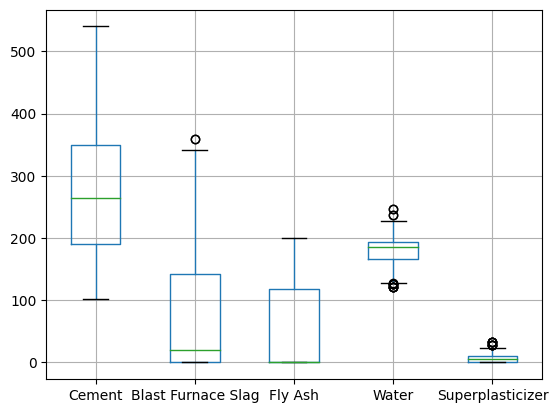

In [11]:
df.boxplot(column=['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer'])

<Axes: >

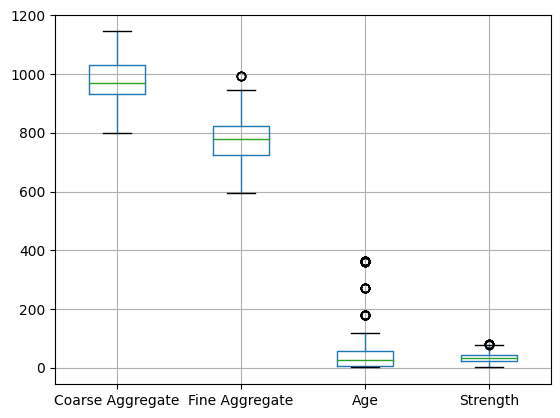

In [12]:
df.boxplot(column=['Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'])

### Split Data

In [13]:
x = df.drop(columns=['Strength'], axis=1)
y = df['Strength']

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=SEED_VALUE)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.4, random_state=SEED_VALUE)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(703, 8) (703,)
(181, 8) (181,)
(121, 8) (121,)


### Scaling

might not be used if the model is good enough

In [15]:
x_train_scaled = x_train.copy()
x_val_scaled = x_val.copy()
x_test_scaled = x_test.copy()

y_train_scaled = y_train.copy()
y_val_scaled = y_val.copy()
y_test_scaled = y_test.copy()

print(x_train_scaled.shape, y_train_scaled.shape)
print(x_val_scaled.shape, y_val_scaled.shape)
print(x_test_scaled.shape, y_test_scaled.shape)

(703, 8) (703,)
(181, 8) (181,)
(121, 8) (121,)


In [16]:
x_train_scaled

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
567,203.5,135.7,0.0,185.7,0.0,1076.2,759.3,7
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
845,321.0,164.0,0.0,190.0,5.0,870.0,774.0,28
422,167.4,129.9,128.6,175.5,7.8,1006.3,746.6,14
984,154.8,0.0,142.8,193.3,9.1,877.2,867.7,28
...,...,...,...,...,...,...,...,...
115,337.9,189.0,0.0,174.9,9.5,944.7,755.8,7
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3
885,153.0,145.0,113.0,178.0,8.0,867.0,824.0,28
459,165.0,128.5,132.1,175.1,8.1,1005.8,746.6,100


In [17]:
from sklearn.preprocessing import RobustScaler # because there are some outliers

RS = RobustScaler()

x_train_scaled = RS.fit_transform(x_train_scaled)
x_val_scaled = RS.transform(x_val_scaled)
x_test_scaled = RS.transform(x_test_scaled)

I scaled the data using robust scaler to handle the outlier as well as because a lot of variable in the data are not normal distribution. Moreover, RobustScaler is designed to handle outliers robustly by scaling features based on median and interquartile range, thus it is less sensitive to outliers

## Normalize the Data

In [18]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [19]:
normalizer.adapt(np.array(x_train))

In the end, I choose this method to normalize the data for it not onlt creates the best model out of the other type of scaling, it also help in improving the convergence speed and stability of optimization algorithms. If we look at the boxplot, the outliers number are actually not that big, thus, I think it is ok for us to just use normalization

## Create Tensor Dataset

In [20]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32).shuffle(10)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32).shuffle(10)
val_ds = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(32).shuffle(10)

In [21]:
train_ds

<_ShuffleDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

## Modelling

### Sequential

In [22]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, Model

In [23]:
sequential = Sequential([
    normalizer,
    Dense(13, activation='relu', input_shape=(8,)),
    Dense(6, activation='relu'),
    Dense(1, activation='linear')
])

sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense (Dense)               (None, 13)                117       
                                                                 
 dense_1 (Dense)             (None, 6)                 84        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 225 (904.00 Byte)
Trainable params: 208 (832.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


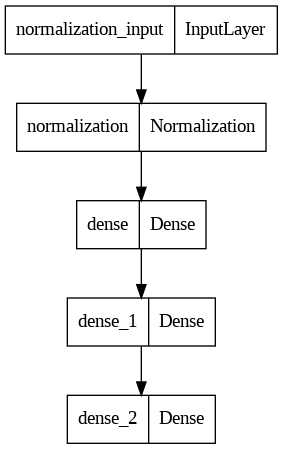

In [24]:
from tensorflow.keras.utils import plot_model

plot_model(sequential)

In [25]:
sequential.compile(loss=["mean_squared_error"], optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), metrics=["mean_squared_error"])

#### Callback Function (No 3)

In [26]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

callback = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=10, min_lr=1e-6)

 The callback function above will reduce the learning rate by a factor of 0.2 if the validation loss does not improve for 5 consecutive epochs, with the minimum learning rate set to 1e-6.

#### Fit the Model

In [27]:
history = sequential.fit(train_ds, validation_data=val_ds, epochs=150, callbacks=callback)

Epoch 1/150
22/22 [==============================] - 1s 11ms/step - loss: 583.3234 - mean_squared_error: 583.3234 - val_loss: 257.1445 - val_mean_squared_error: 257.1445 - lr: 0.1000
Epoch 2/150
22/22 [==============================] - 0s 3ms/step - loss: 162.5488 - mean_squared_error: 162.5488 - val_loss: 173.5663 - val_mean_squared_error: 173.5663 - lr: 0.1000
Epoch 3/150
22/22 [==============================] - 0s 3ms/step - loss: 133.0481 - mean_squared_error: 133.0481 - val_loss: 158.8107 - val_mean_squared_error: 158.8107 - lr: 0.1000
Epoch 4/150
22/22 [==============================] - 0s 3ms/step - loss: 122.2244 - mean_squared_error: 122.2244 - val_loss: 156.8731 - val_mean_squared_error: 156.8731 - lr: 0.1000
Epoch 5/150
22/22 [==============================] - 0s 3ms/step - loss: 108.8330 - mean_squared_error: 108.8330 - val_loss: 127.4199 - val_mean_squared_error: 127.4199 - lr: 0.1000
Epoch 6/150
22/22 [==============================] - 0s 3ms/step - loss: 89.6443 - mean_s

the model has run for 150 epoch with mse of 26.0555 on the train data and 49.3749 on the validation data. I think we can conclude that the model is not yet a very good model in terms of its precision in predicting the output(concrete strength)

the number change a little bit every time i re-fit the model, however, it is not that significant (so please keep that in mind, Pak 😢)

#### Model Evaluation

R2 Score

In [28]:
from sklearn.metrics import r2_score

y_pred = sequential.predict(x_test)
r2_score(y_test, y_pred)

4/4 [==============================] - 0s 4ms/step


0.8348877594070572

MSE

In [29]:
from sklearn.metrics import mean_squared_error

y_pred = sequential.predict(x_test)
mean_squared_error(y_test, y_pred)

4/4 [==============================] - 0s 4ms/step


36.743208009397215

Train Test Lost

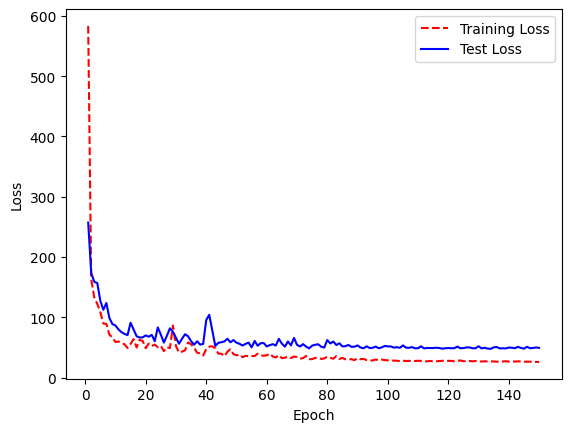

In [30]:
import matplotlib.pyplot as plt

training_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Based on the train and test lost graph above, the model has reached convergence since epoch 80. As for the R2 Score and MSE, we can see that those numbers are contrary to each other. R2 Score itself explains the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features), while MSE represents the average squared difference between the actual and predicted values. So, we can conclude that the model is performing well in terms of explaining the variance in the target variable (R^2 score), but there are still a lot of significant errors in the predictions (MSE).

To improve the model prediction performance, we will still need to do research on the feature processing or hyperparameter tuning for it may be the cause of why the model does not perform well when predicting. However, the data that is not suitable to the model may also be the root of the model perfoemance issue. Overall, further research is still needed to know exactly the reason why.

### Functional

In [31]:
inputs = tf.keras.Input(shape=(8,))
normalized_input = normalizer(inputs)
dense1 = Dense(13, activation='relu')(normalized_input)
dense2 = Dense(2, activation='relu')(dense1)
cat_layer = tf.keras.layers.Concatenate(axis=1)([dense1, dense2])
outputs = Dense(1)(cat_layer)

In [32]:
functional = Model(inputs=inputs, outputs=outputs)
functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 normalization (Normalizati  (None, 8)                    17        ['input_1[0][0]']             
 on)                                                                                              
                                                                                                  
 dense_3 (Dense)             (None, 13)                   117       ['normalization[1][0]']       
                                                                                                  
 dense_4 (Dense)             (None, 2)                    28        ['dense_3[0][0]']         

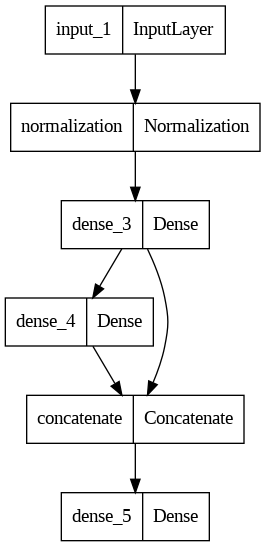

In [33]:
from tensorflow.keras.utils import plot_model

plot_model(functional)

In [34]:
functional.compile(loss=["mean_squared_error"], optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["mean_squared_error"])

#### Callback function (No 3)

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience=10, mode='auto')

The callback function above will stop the training if the validation loss does not improve for 10 consecutive epochs, and the model will be restored to the weights that achieved the best validation loss

#### Fit the Model

In [36]:
history = functional.fit(train_ds, validation_data=val_ds, epochs=150, callbacks=callback)

Epoch 1/150
22/22 [==============================] - 1s 13ms/step - loss: 1322.4910 - mean_squared_error: 1322.4910 - val_loss: 1314.5454 - val_mean_squared_error: 1314.5454
Epoch 2/150
22/22 [==============================] - 0s 5ms/step - loss: 1039.7351 - mean_squared_error: 1039.7351 - val_loss: 899.2556 - val_mean_squared_error: 899.2556
Epoch 3/150
22/22 [==============================] - 0s 6ms/step - loss: 574.8536 - mean_squared_error: 574.8536 - val_loss: 379.9900 - val_mean_squared_error: 379.9900
Epoch 4/150
22/22 [==============================] - 0s 5ms/step - loss: 239.0833 - mean_squared_error: 239.0833 - val_loss: 237.7917 - val_mean_squared_error: 237.7917
Epoch 5/150
22/22 [==============================] - 0s 5ms/step - loss: 173.9728 - mean_squared_error: 173.9728 - val_loss: 201.1004 - val_mean_squared_error: 201.1004
Epoch 6/150
22/22 [==============================] - 0s 5ms/step - loss: 150.1278 - mean_squared_error: 150.1278 - val_loss: 192.8829 - val_mean_squ



the model has run for 150 epoch with mse of 29.8690  on the train data and 49.8342 on the validation data. I think we can conclude that the model is not yet a very good model in terms of its precision in predicting the output(concrete strength)

the number change a little bit every time i re-fit the model, however, it is not that significant (so please keep that in mind, Pak 😢)

#### Model Evaluation

R2 Score

In [37]:
from sklearn.metrics import r2_score

y_pred = functional.predict(x_test)
r2_score(y_test, y_pred)

4/4 [==============================] - 0s 3ms/step


0.7640702768292702

MSE

In [38]:
from sklearn.metrics import mean_squared_error

y_pred = functional.predict(x_test)
mean_squared_error(y_test, y_pred)

4/4 [==============================] - 0s 3ms/step


52.50255742960432

Train Val Loss

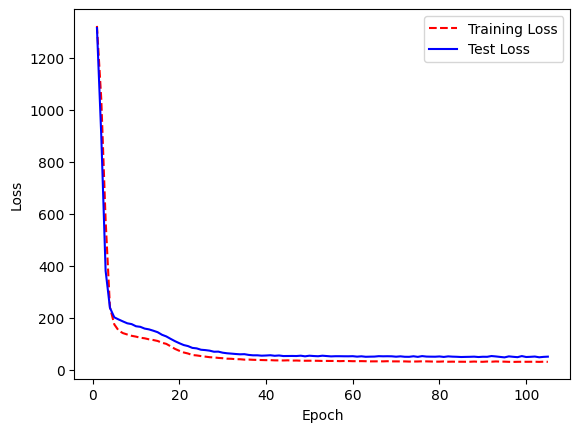

In [39]:
import matplotlib.pyplot as plt

training_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Based on the train and test lost graph above, the model has reached convergence since epoch 30ish. As for the R2 Score and MSE, we can see that likewise the sequential model, those numbers are contrary to each other. R2 Score itself explains the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features), while MSE represents the average squared difference between the actual and predicted values. So, we can conclude that the model is performing well in terms of explaining the variance in the target variable (R^2 score), but there are still a lot of significant errors in the predictions (MSE).

To improve the model prediction performance, we will still need to do research on the feature processing or hyperparameter tuning for it may be the cause of why the model does not perform well when predicting. However, the data that is not suitable to the model may also be the root of the model perfoemance issue. Overall, further research is still needed to know exactly the reason why.

# No 4

In your own words, explain briefly what a callback function does! (max. 1 point)

A callback function is a function that is passed as an argument to another function, and it gets executed at a later point in time, usually after some specific event or condition as its trigger has occured. In this situation (deep learning, machine learning(?)), it is called repeatedly during a certain process and is used to validate or correct a certain behavior (learning rate does not improve). For example, we can use it to define what happen before, during or at the end of an epoch.

# No 5

Tell me a joke related to ANN / Deep Learning

- Why did the deep learning model join a comedy club? Because it heard they had great "training" data for laugh detection!
- Why did the artificial neural network go to therapy? Because it couldn't stop overthinking its activation functions!
